## Task to be completed Here


1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

2. Plot bar charts showing impact of employee salaries on retention

3. Plot bar charts showing corelation between department and employee retention

4. Now build logistic regression model using variables that were narrowed down in step 1

5. Measure the accuracy of the model

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#### Import Dataset --- data set is downlaoded from Kaggle

In [6]:
emp_reten_df = pd.read_csv("D:\\Project\\CodeBasicsTasks\\LogisticRegression_HumanAnalytics\\HR_comma_sep.csv")

In [8]:
emp_reten_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
emp_reten_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
emp_reten_df.shape

(14999, 10)

In [11]:
emp_reten_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [21]:
emp_reten_df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
# Indepenedent Variable

0    11428
1     3571
Name: left, dtype: int64


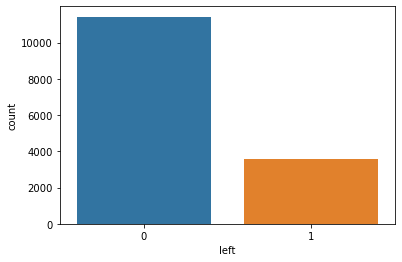

In [20]:
print(emp_reten_df["left"].value_counts())
sns.countplot(emp_reten_df["left"])

"1" indiactes employee left the company and "0" indicates employee stays in the company

In [24]:
emp_reten_df.groupby(emp_reten_df["left"]).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


1. From the above table , employee with more satisfaction_level will retain in the company
2. Employee with promotion will stay in the company
3. Average monthly_average_hours for employees leaving the company is more


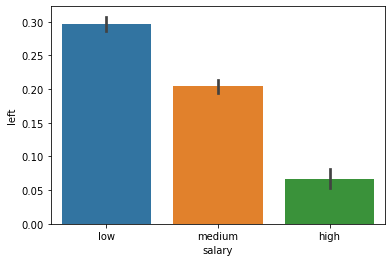

In [29]:
sns.barplot(x="salary",y="left", data=emp_reten_df )

 From the above barplot people with high low salary are more likely to leave the company compared to people with low salary

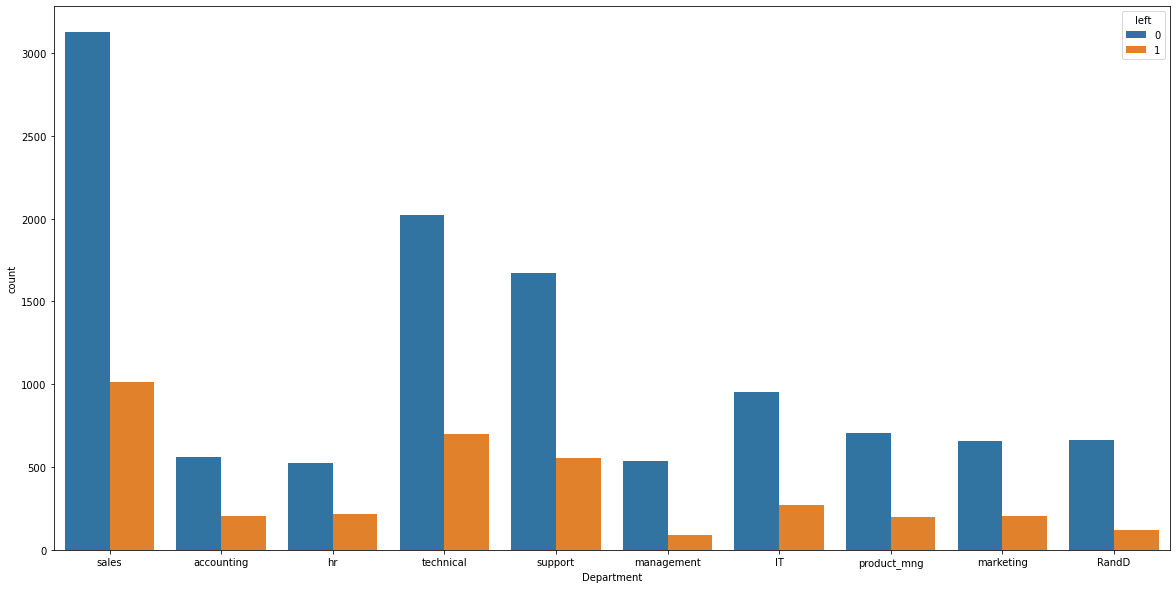

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(x="Department",hue="left", data=emp_reten_df)

Department doesnot have much influence on employee retention

#### Selected Variables

1. Satisfaction Level
2. Average Monthly Hours
3. Promotion last 5years
4. Salary

In [37]:
empl_ret_select_var = emp_reten_df[["satisfaction_level","average_montly_hours","promotion_last_5years","salary"]]

In [38]:
empl_ret_select_var.describe()

,satisfaction_level,average_montly_hours,promotion_last_5years
count,14999.000000,14999.000000,14999.000000
mean,0.612834,201.050337,0.021268
std,0.248631,49.943099,0.144281
min,0.090000,96.000000,0.000000
25%,0.440000,156.000000,0.000000
50%,0.640000,200.000000,0.000000
75%,0.820000,245.000000,0.000000
max,1.000000,310.000000,1.000000


In [ ]:
## Creating Dummy Variable  for salary variable

In [45]:
salary_dummy = pd.get_dummies(empl_ret_select_var["salary"])
empl_ret_select_var = pd.concat([empl_ret_select_var,salary_dummy], axis="columns")

In [46]:
empl_ret_select_var.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [49]:
empl_ret_select_var.drop("salary", axis="columns", inplace= True)

In [50]:
empl_ret_select_var.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [64]:
X = empl_ret_select_var 

In [65]:
y= emp_reten_df["left"]

#### Data Partitioning


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train,y_test = train_test_split(empl_ret_select_var,emp_reten_df["left"], train_size = 0.7, random_state=0  )

## Logistic regression


In [68]:
from sklearn.linear_model import LogisticRegression


In [69]:
model = LogisticRegression()
model.fit(X_train,y_train )

LogisticRegression()

In [70]:
train_predict = model.predict(X_train)

In [73]:
train_predict.shape

(10499,)

In [74]:
y_train.shape

(10499,)

#### Training Accuracy

In [88]:
train_predict= model.predict(X_train)

In [89]:
accuracy_score(y_train,train_predict)

0.7739784741403943

In [91]:
model.score(X_train,y_train)

0.7739784741403943

#### Test Accuracy

In [90]:
test_predict = model.predict(X_test)

In [92]:
accuracy_score(y_test,test_predict)

0.7788888888888889

In [86]:
model.score(X_test,y_test)

0.7788888888888889